# Background and Context:

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

# Objective:

To come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.

# Data Dictionary:

1) S.No. : Serial Number

2) Name : Name of the car which includes Brand name and Model name

3) Location : The location in which the car is being sold or is available for purchase Cities

4) Year : Manufacturing year of the car

5) Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.

6) Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

7) Transmission : The type of transmission used by the car. (Automatic / Manual)

8) Owner : Type of ownership

9) Mileage : The standard mileage offered by the car company in kmpl or km/kg

10) Engine : The displacement volume of the engine in CC.

11) Power : The maximum power of the engine in bhp.

12) Seats : The number of seats in the car.

13) New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)

14) Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

# Import the necessary libraries :

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
# Import necessary libraries.
import warnings
warnings.filterwarnings("ignore")


# Load and explore the data:

In [3]:
usedcarsdata = pd.read_csv('used_cars_data.csv')
df = usedcarsdata.copy()

In [6]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [10]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [12]:
df.shape

(7253, 14)

**Observations**
* There are 7253 rows and 14 columns
* There are 5 numerical variables and 9 categorical variables.

# Conversion of objects into Numerical or categorical variables for better analysis:

In [77]:
 df['Fuel_Type'] = df.Fuel_Type.astype('category')
df['Transmission'] = df.Transmission.astype('category')
# df['Owner_Type'] = df.Owner_Type.astype('category')
df['New_Price'] = df.New_Price.astype('float64')
df['Mileage'] = df.Mileage.astype('float64')

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7246 entries, 0 to 7252
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Year               7246 non-null   int64   
 1   Kilometers_Driven  7246 non-null   int64   
 2   Fuel_Type          7246 non-null   category
 3   Mileage            7244 non-null   category
 4   Seats              7246 non-null   float64 
 5   Price              7246 non-null   float64 
 6   Owner_Type         7246 non-null   category
dtypes: category(3), float64(2), int64(2)
memory usage: 655.2 KB


# Lets us look at missing values :

In [178]:
df.isna().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Mileage              2
Seats                0
Price                0
Owner_Type           0
dtype: int64

# Let us fix missing values:

In [15]:
# we will replace missing values in every column with its median
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)


# Check the unique values for the categorical column of the dataframe:

In [179]:
df.nunique(axis=0)

Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Mileage               450
Seats                   9
Price                1373
Owner_Type              4
dtype: int64

# Dropping of columns (Removing NAN ):

Observations:
* Since there are some particular columns which are not relevant for our analysis and to be dropped right away. 
* They are S.No., Name, Location, Transmission which can be dropped right away. 
*  New_Price column has a lot of missing values and is also not needed for our analysis as our analysis for the pricing model is based on the price of the used cars . New_Price column gives us the price of the new car data which is not neceesary for our pricing model analysis.

In [63]:
# df.drop(['New_Price'],axis=1,inplace=True)
 df.drop(['S.No.','Name', 'Location', 'Transmission', 'New_Price'],axis=1,inplace=True)

# Lets look at summary of our data:

In [67]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,7253.000,NaN,NaN,NaN,2013.365,3.254,1996.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,7253.000,NaN,NaN,NaN,58699.063,84427.721,171.000,34000.000,53416.000,73000.000,6500000.000
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7207,386,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seats,7253.000,NaN,NaN,NaN,5.278,0.809,0.000,5.000,5.000,5.000,10.000
Price,7253.000,NaN,NaN,NaN,8.826,10.293,0.440,3.850,5.640,8.400,160.000
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:
* From the above table, we can see that OwnerType has a duplicated twice in the dataset . So we can drop one of the OwnerType column .

In [86]:
dupes = df.duplicated()
sum(dupes)
df = df.drop_duplicates()
df.info()

In [87]:
# I get the same random results every time
np.random.seed(1)
df.sample(n=10)

,Year,Kilometers_Driven,Fuel_Type,Mileage,Engine,Power,Seats,Price,Owner_Type
5040,2003,62000,Petrol,11.3 kmpl,1298 CC,83.1 bhp,8.000,1.250,Second
5667,2015,53497,Petrol,18.0 kmpl,1198 CC,86.7 bhp,5.000,5.450,First
2781,2010,38127,Petrol,19.7 kmpl,796 CC,46.3 bhp,5.000,1.550,First
3659,2015,27000,Petrol,19.0 kmpl,1199 CC,88.7 bhp,5.000,5.950,First
2868,2013,69000,Diesel,23.4 kmpl,1248 CC,74 bhp,5.000,5.750,First
3781,2015,49894,Diesel,23.59 kmpl,1364 CC,67.06 bhp,5.000,5.270,First
186,2014,37382,Diesel,13.0 kmpl,2143 CC,201.1 bhp,5.000,32.000,First
305,2014,61726,Diesel,17.68 kmpl,1968 CC,174.33 bhp,5.000,20.770,First
3204,2015,58734,Diesel,20.77 kmpl,1248 CC,88.76 bhp,7.000,6.910,First
3452,2014,33000,Petrol,19.1 kmpl,1197 CC,85.8 bhp,5.000,3.990,First


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7246 entries, 0 to 7252
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Year               7246 non-null   int64   
 1   Kilometers_Driven  7246 non-null   int64   
 2   Fuel_Type          7246 non-null   category
 3   Mileage            7244 non-null   category
 4   Seats              7246 non-null   float64 
 5   Price              7246 non-null   float64 
 6   Owner_Type         7246 non-null   category
dtypes: category(3), float64(2), int64(2)
memory usage: 655.2 KB


# Univariate Analysis of Numerical Variables:

In [30]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

* As our model is based primarily on the analysis of the prices of the used  cars , the Price variable acts as the dependent variable .

# Observations on Price:

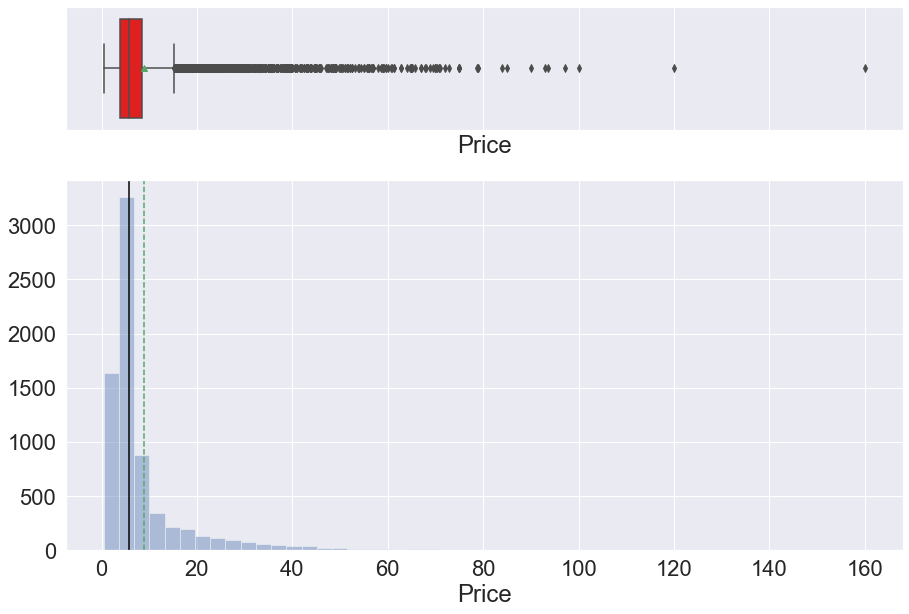

In [68]:
histogram_boxplot(df.Price)

# Observations on Kilometers_Driven:

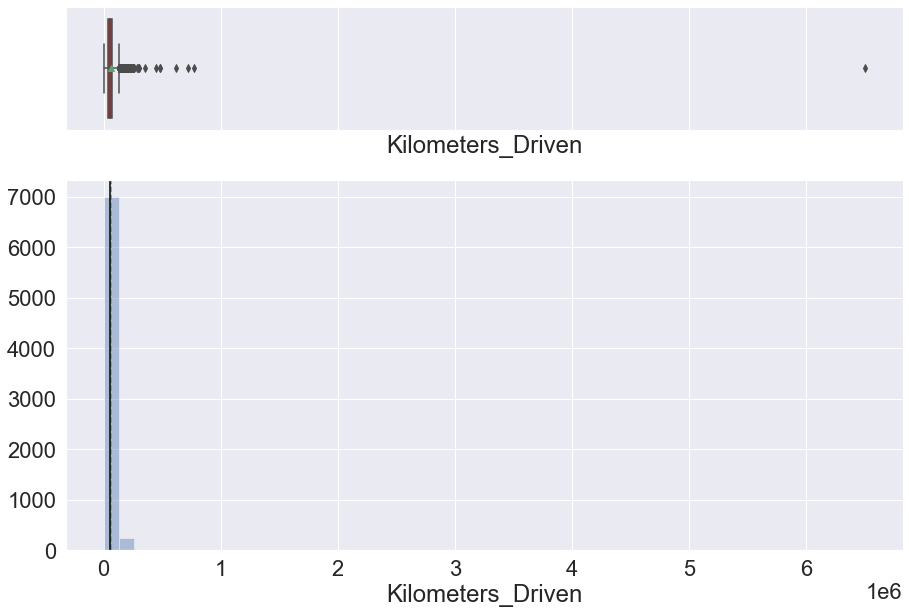

In [69]:
histogram_boxplot(df.Kilometers_Driven)

In [ ]:
histogram_boxplot(df.Kilometers_Driven)

# Observations on Years:

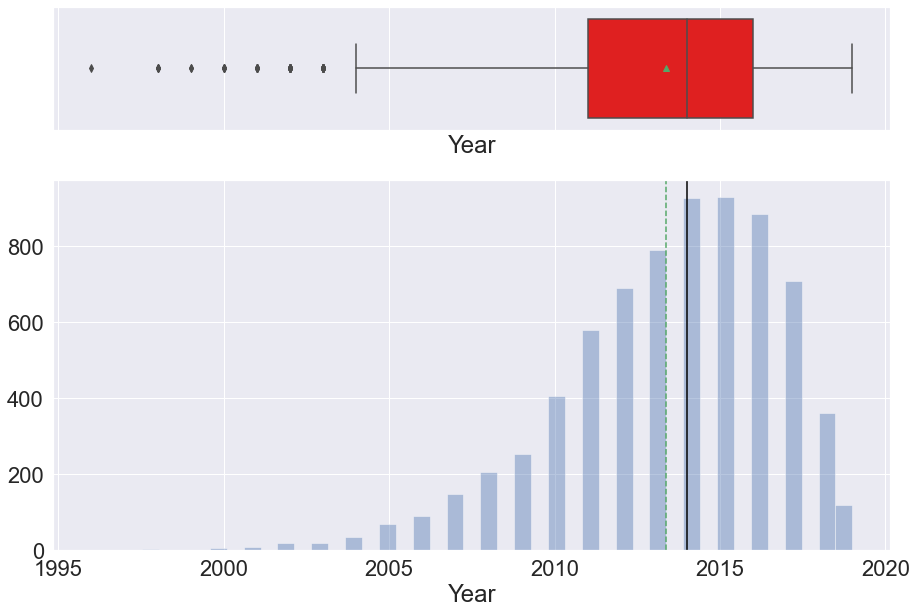

In [92]:
histogram_boxplot(df.Year)

In [181]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,7246.000,NaN,NaN,NaN,2013.365,3.254,1996.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,7246.000,NaN,NaN,NaN,58713.098,84464.372,171.000,34000.000,53497.000,73000.000,6500000.000
Fuel_Type,7246,5,Diesel,3848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7244,450,17.0 kmpl,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seats,7246.000,NaN,NaN,NaN,5.278,0.809,0.000,5.000,5.000,5.000,10.000
Price,7246.000,NaN,NaN,NaN,8.830,10.298,0.440,3.850,5.640,8.408,160.000
Owner_Type,7246,4,First,5945,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checking for NA values:

In [182]:
df.isnull().sum().sort_values(ascending=False)

Mileage              2
Owner_Type           0
Price                0
Seats                0
Fuel_Type            0
Kilometers_Driven    0
Year                 0
dtype: int64

Observations:
* Looking at the above dataset, the Power and the Engine columns are summing up for more NAN (missing values) and so is better to be dropped.
    

In [ ]:
 df.drop(['Power','Engine' ],axis=1,inplace=True)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7246 entries, 0 to 7252
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Year               7246 non-null   int64   
 1   Kilometers_Driven  7246 non-null   int64   
 2   Fuel_Type          7246 non-null   category
 3   Mileage            7244 non-null   category
 4   Seats              7246 non-null   float64 
 5   Price              7246 non-null   float64 
 6   Owner_Type         7246 non-null   category
dtypes: category(3), float64(2), int64(2)
memory usage: 655.2 KB


In [96]:
df.isnull().sum().sort_values(ascending=False)

Mileage              2
Owner_Type           0
Price                0
Seats                0
Fuel_Type            0
Kilometers_Driven    0
Year                 0
dtype: int64

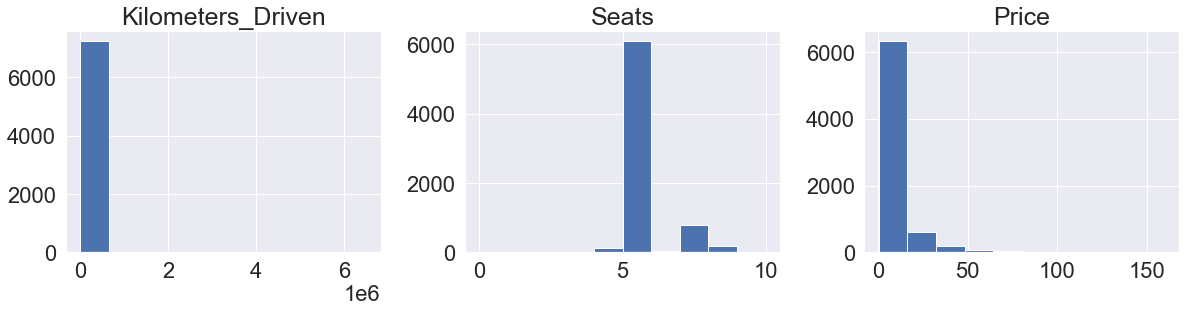

In [98]:
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
all_col.remove('Year')
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

Both Price and Kilometers_Driven are right skewed

# Correlation Map:

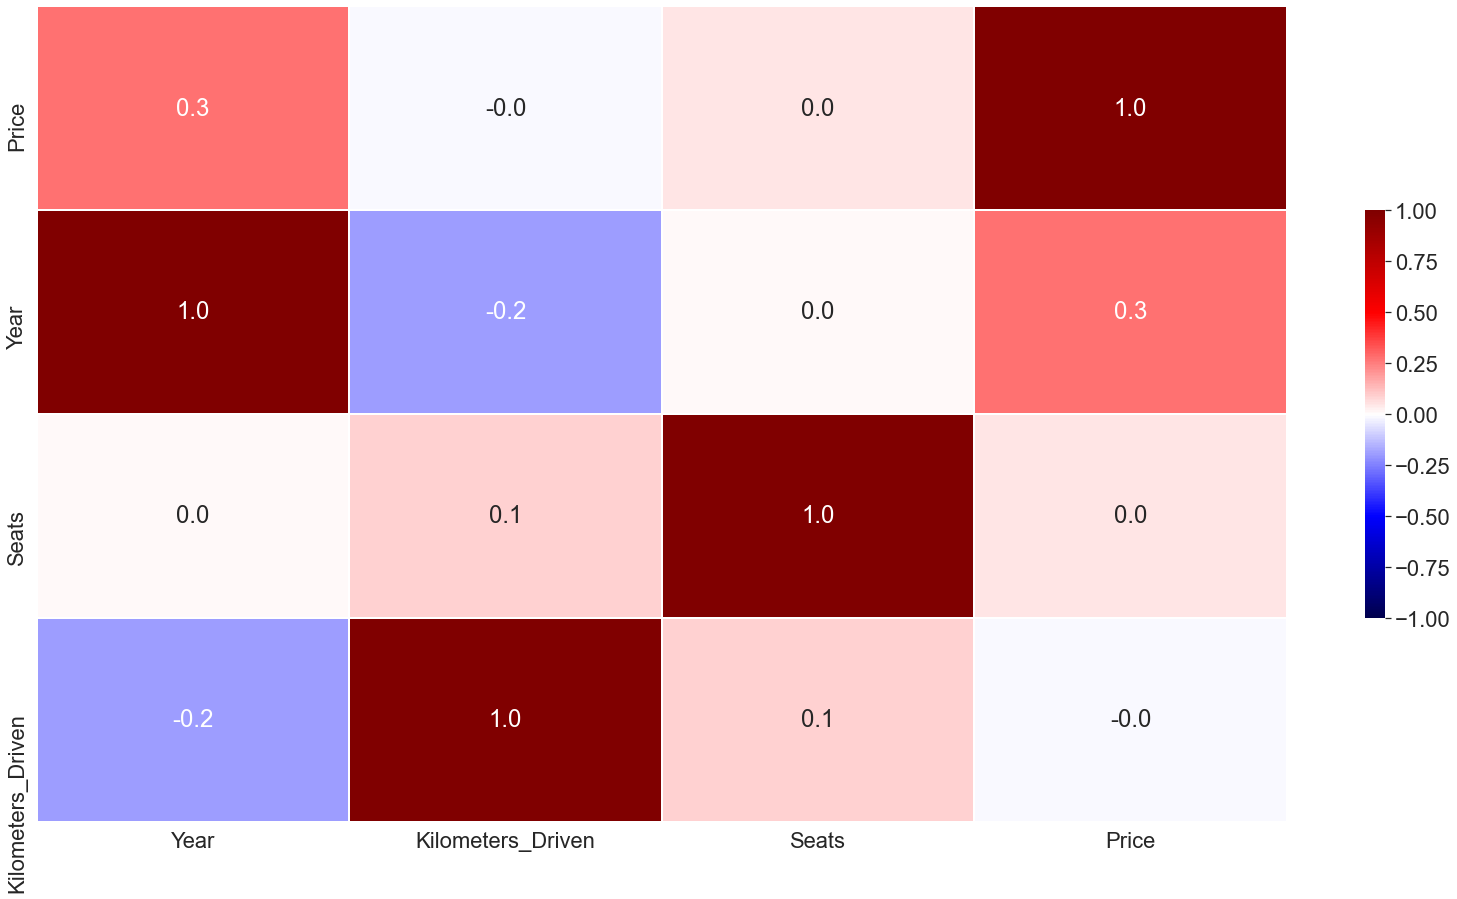

In [101]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
corr = df[numeric_columns].corr().sort_values(by=['Price'],ascending=False) # sorting correlations w.r.t Price 


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

# Multivariate Analysis of Numerical variables with respect to Categorical variables:

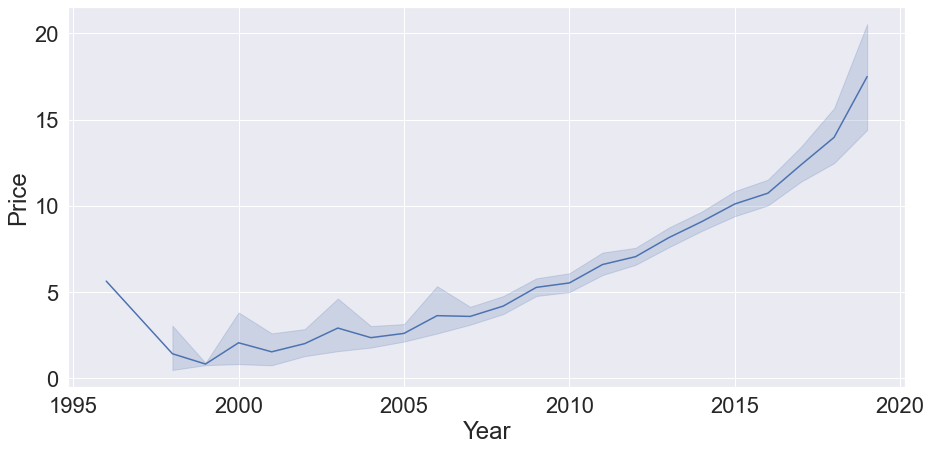

In [106]:
# How does Price of the used cars across years
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price',
             data=df,);


* There is a great increase with respect to the year for the price across the years from 1995 to 2020.

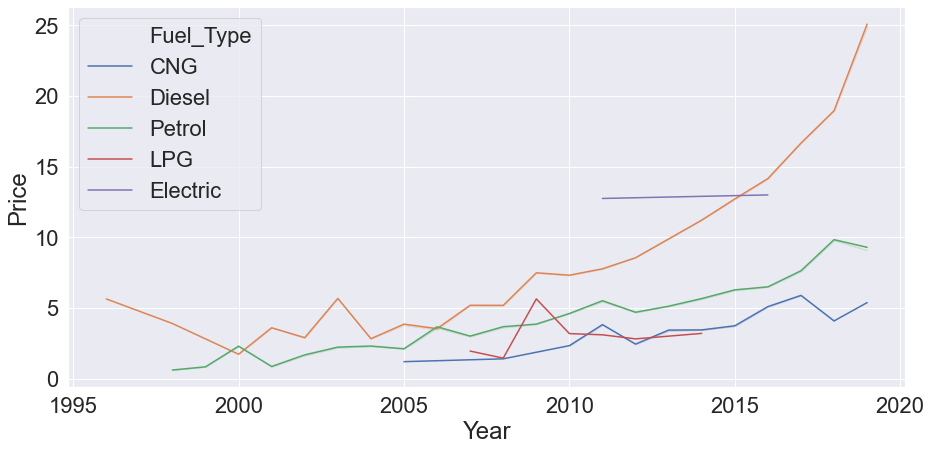

In [108]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price',hue='Fuel_Type',ci=0,
             data=df);

* The Diesel Fuel Type cars are highly sold out across the years 1995 to 2020.
* As Electic cars are familiar during the 2000s, So Electric cars were sold out from year 2010- 2020.
* Petrol cars did had a demand as equal to Diesel cars across the years 1995 to 2020.
* Electic cars are expensive win terms of Price so its less sold out.

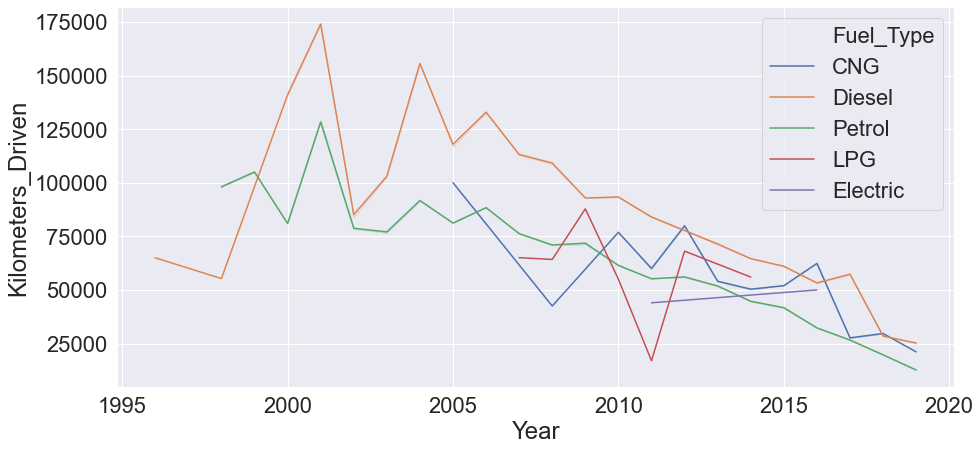

In [110]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Kilometers_Driven',hue='Fuel_Type',ci=0,
             data=df);

* Petrol and Diesel cars are driven for more Kms meaning it has a higher milegae compared to other cars and also when compared with Price , its more affordable compared to other Fuel type cars.


# Data Preparation:

# Fix data type:

In [184]:
df['Mileage'] = df.Mileage.astype('category')

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7246 entries, 0 to 7252
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Year               7246 non-null   int64   
 1   Kilometers_Driven  7246 non-null   int64   
 2   Fuel_Type          7246 non-null   category
 3   Mileage            7244 non-null   category
 4   Seats              7246 non-null   float64 
 5   Price              7246 non-null   float64 
 6   Owner_Type         7246 non-null   category
dtypes: category(3), float64(2), int64(2)
memory usage: 655.2 KB


# Model Building:

In [207]:
df.head()

,Year,Kilometers_Driven,Fuel_Type,Mileage,Seats,Price,Owner_Type
0,2010,72000,CNG,26.6 km/kg,5.000,1.750,First
1,2015,41000,Diesel,19.67 kmpl,5.000,12.500,First
2,2011,46000,Petrol,18.2 kmpl,5.000,4.500,First
3,2012,87000,Diesel,20.77 kmpl,7.000,6.000,First
4,2013,40670,Diesel,15.2 kmpl,5.000,17.740,Second


In [215]:
#Defining X and y variables
X = X.head()
y = y.head()

print(X.head())
print(y.head())


   Owner_Type
0           1
   Price     Mileage  Kilometers_Driven  Seats  Year
0  1.750  26.6 km/kg              72000  5.000  2010
1 12.500  19.67 kmpl              41000  5.000  2015
2  4.500   18.2 kmpl              46000  5.000  2011
3  6.000  20.77 kmpl              87000  7.000  2012
4 17.740   15.2 kmpl              40670  5.000  2013


In [209]:
print(X.shape)
print(y.shape)

(1, 1)
(5, 5)


In [ ]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [212]:
X_train.head()
 y_train

,Year,Kilometers_Driven,Mileage,Seats,Owner_Type
952,2018,92056,13.68 kmpl,7.000,First
2263,2014,64557,12.7 kmpl,5.000,Second
1504,2017,43775,20.77 kmpl,7.000,First
7213,2013,170000,22.3 kmpl,5.000,First
3079,2016,29000,10.91 kmpl,7.000,First


In [163]:
print(X_train)

      Year  Kilometers_Driven Fuel_Type     Mileage  Seats Owner_Type 
952   2018              92056    Diesel  13.68 kmpl  7.000       First
2263  2014              64557    Diesel   12.7 kmpl  5.000      Second
1504  2017              43775    Diesel  20.77 kmpl  7.000       First
7213  2013             170000    Diesel   22.3 kmpl  5.000       First
3079  2016              29000    Diesel  10.91 kmpl  7.000       First
...    ...                ...       ...         ...    ...         ...
3773  2015              15000    Petrol   18.9 kmpl  5.000       First
5193  2014              79000    Diesel   24.0 kmpl  5.000       First
5228  2005             126000    Petrol   17.0 kmpl  5.000      Second
5392  2013              98000    Diesel  18.56 kmpl  5.000       First
860   2011              98000    Diesel   12.8 kmpl  8.000      Second

[5072 rows x 6 columns]


In [ ]:
 X_train.drop(['Fuel_Type'],axis=1,inplace=True)

In [216]:
print(X_train)

      Year  Kilometers_Driven     Mileage  Seats Owner_Type 
952   2018              92056  13.68 kmpl  7.000       First
2263  2014              64557   12.7 kmpl  5.000      Second
1504  2017              43775  20.77 kmpl  7.000       First
7213  2013             170000   22.3 kmpl  5.000       First
3079  2016              29000  10.91 kmpl  7.000       First
...    ...                ...         ...    ...         ...
3773  2015              15000   18.9 kmpl  5.000       First
5193  2014              79000   24.0 kmpl  5.000       First
5228  2005             126000   17.0 kmpl  5.000      Second
5392  2013              98000  18.56 kmpl  5.000       First
860   2011              98000   12.8 kmpl  8.000      Second

[5072 rows x 5 columns]


In [219]:
X_train = df[['Year', 'Kilometers_Driven', 'Seats','Price']]
y_train = y.head()

In [223]:
X_train
y_train

,Price,Mileage,Kilometers_Driven,Seats,Year
0,1.750,26.6 km/kg,72000,5.000,2010
1,12.500,19.67 kmpl,41000,5.000,2015
2,4.500,18.2 kmpl,46000,5.000,2011
3,6.000,20.77 kmpl,87000,7.000,2012
4,17.740,15.2 kmpl,40670,5.000,2013
